<style>
.box{
    border-radius: 5px;
    padding: 20px;
    width: 100%;
    border: 1px solid #022b37;
    margin-bottom: 10px;
    margin-top: 50px;
}

.quarto-title-banner {
color: #000000 !important;
border-bottom: 1px solid #022b37 !important;
}

pre{
    background-color: #000000 !important;
    opacity: 0.85;
}

body{
    background-color: #ffffff !important;
}
.sidebar nav[role="doc-toc"] ul > li > a{
    color: #464646 !important;
}

.sidebar nav[role="doc-toc"] ul > li > a.active{
    color: #000000 !important;
    border-color:  #000000 !important;
    font-size: calc(var(--bs-body-font-size)*1.05) !important;);
}

.cell-output {
    background-color: #f0f2f4!important;
    padding: 20px;
    border-radius: 5px;
    border: 1px solid #eef0f3;
    margin-bottom: 30px;
}
.cell-output pre{
    background-color: #f0f2f4!important;
    opacity: 1;
}

img{
    border-radius: 5px;
}

/*
.cell-output {
    background-color: #000000!important;
    opacity: 0.85;
    color: #ffffff !important;
    padding: 20px;
    border-radius: 5px;
    border: 1px solid #eef0f3;
}
*/
</style>


---

Importing and screening the data...

In [1]:
# set working directory based on the git repository
repo_dir<-system("git rev-parse --show-toplevel", intern=TRUE)
current_ex="/02_data_processing"
setwd(paste(repo_dir,current_ex, sep=""))
#getwd()

# read the data
dat <- read.table ("allplotsaggregatedspectra.txt", header=T) #spectra in rows and wavelengths in columns
wl <- read.table ("bands.txt", header=T,sep=",") #wavelength information and an indicator of band quality
traits <- read.table ("N_percDW_all.txt", header=T) # leaf nitrogen (in % leaf dry weight) information that was measured for each observation in four replicates.
#head(dat)
#str(dat)

# mean 
n <- rowMeans(traits) # mean applied on each row

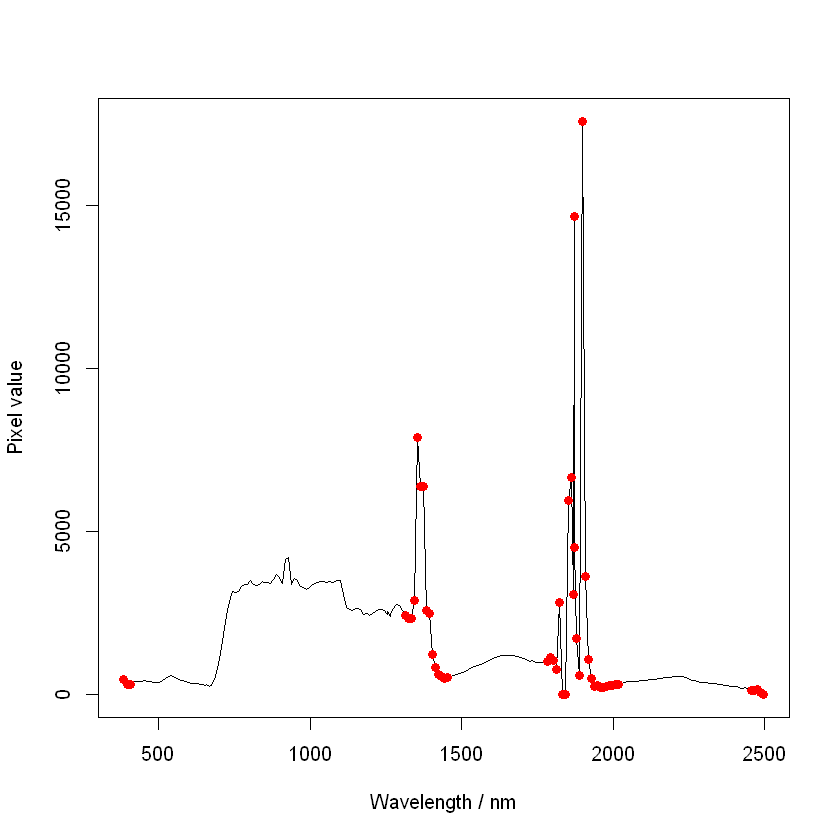

In [2]:
#| code-fold: true
# plot a few of them against the wavelength of the respective bands.
plot (wl[,2], dat[1,], type="l",xlab="Wavelength / nm", ylab="Pixel value")
# add points for bad quality bands
points (wl[wl[,3]==1, 2], dat[1,wl[,3]==1], pch=19, col="red")

<div class="box"> 
## Q2.1 (3 pts) In which regions are the bad bands located? What are possible reasons for their quality issues?
</div>

In [3]:
wl[wl[,3]==1, 2]

[1]  385  395  405 1313 1323 1333 1343 1353 1363 1373 1383 1393 1403 1413 1423
[16] 1433 1443 1453 1782 1792 1802 1811 1821 1831 1841 1851 1861 1868 1871 1873
[31] 1878 1888 1898 1908 1918 1928 1938 1948 1958 1968 1978 1988 1998 2008 2018
[46] 2457 2467 2477 2487 2497

<span style="color:#fc8acc">
**Answer:**
</span>

The regions in which the bad bands are located are:

- in the UV domain between 385 - 405 nm
- in the NIR between 1313-1454 nm
- in the NIR between 1782-2018 nm
- in the NIR between 2457-2497 nm

Possible reasons could be:

- for the UV domain: bad quality of the sensor and maybe rayleigh scattering
- for the NIR between 1313-1454 nm water absorption
- for the NIR between 1782-2018 nm water absorption and co2 absorption - water for the first part, then from ca 1900 nm co2
- for the NIR between 2457-2497 nm water absorption as well

---

<br>

In [4]:
#keep the original wavelentgh information
wl_orig<- wl$WVL

# remove all bands that are marked as bad quality
dat <- dat[,wl[,3]==0]
wl <- wl[wl[,3]==0,2]
# further, due to a detector overlap, two wavelengths are replicated in the data set with two bands each. We eliminate the replicates as well.
dat <- dat[,-c (91,93)]
wl <- wl[-c (91,93)]

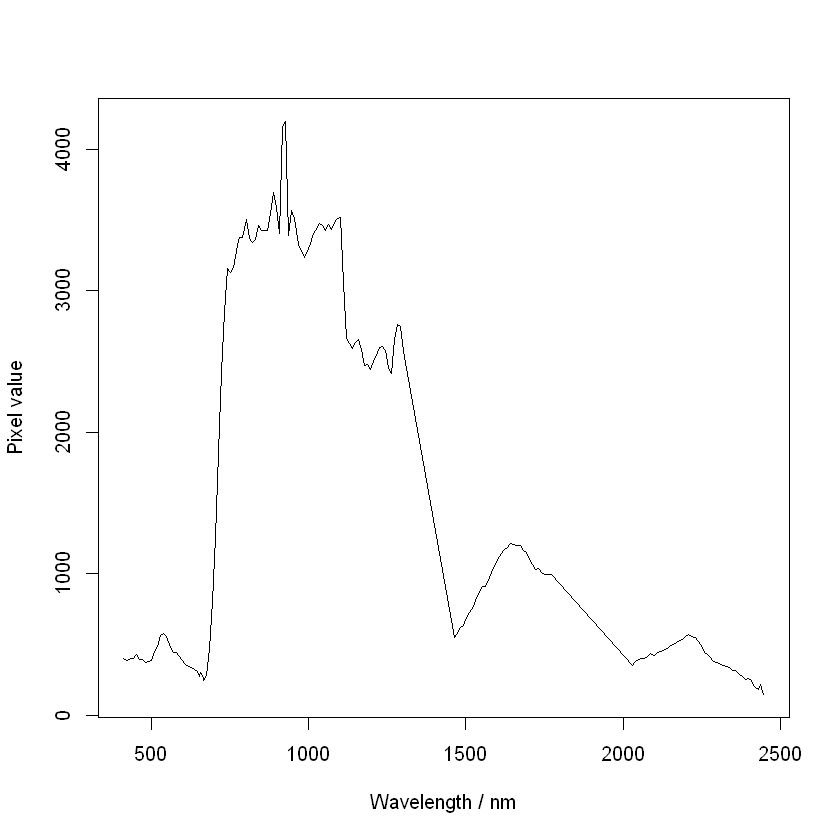

In [5]:
#| code-fold: true
# plot the data again
plot (wl, dat[1,], type="l", xlab="Wavelength / nm", ylab="Pixel value")

<div class="box">
## Q2.2 (1 pt) What is the original spectral resolution of the data?
</div>

In [6]:
library(IRdisplay)

printDist <- function (inputList, varname){
  display(paste("Distances for",varname))
  # the distances bewtween the points
  distances <- diff(inputList)
  # as a data frame containing first and second point and the distance between them
  distancesDF <- data.frame(
    Point = inputList[-length(inputList)], # exclude last point because there's no next point
    Next_Point = inputList[-1],     # exclude first point because there's no previous point
    Distance = distances
  )
  printDF <- sapply(distancesDF, as.numeric) #print without type column
  display(head(printDF))
  display(summary(distancesDF[,"Distance"]))
  display("Maximal distance")
  display(printDF[distancesDF["Distance"]==max(distancesDF["Distance"]),])
  display("Minimal distance")
  printDF[distancesDF["Distance"]==min(distancesDF["Distance"]),]
}

printDist(wl_orig, "Original Wavelengths")
printDist(wl, "Corrected Wavelengths")

[1] "Distances for Original Wavelengths"

Point Next_Point Distance
[1,] 385   395        10      
[2,] 395   405        10      
[3,] 405   414         9      
[4,] 414   424        10      
[5,] 424   434        10      
[6,] 434   443         9

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000  10.000  10.000   9.557  10.000  11.000 

[1] "Maximal distance"

Point Next_Point   Distance 
      2088       2099         11

[1] "Minimal distance"

Point Next_Point Distance
[1,] 1253  1253       0       
[2,] 1263  1263       0

[1] "Distances for Corrected Wavelengths"

Point Next_Point Distance
[1,] 414   424        10      
[2,] 424   434        10      
[3,] 434   443         9      
[4,] 443   453        10      
[5,] 453   463        10      
[6,] 463   472         9

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   10.00   10.00   12.03   10.00  256.00 

[1] "Maximal distance"

Point Next_Point   Distance 
      1772       2028        256

[1] "Minimal distance"

Point Next_Point Distance
[1,] 655   658        3       
[2,] 665   668        3

<span style="color:#fc8acc">
**Answer:**
</span>

The original spectral resolution of the data is as median 10 nm and varies mostly between 9 and 10 nm. 
For the corrected wavelengths there is a minimum distance of 3 nm to the next band at 665 nm and a maximum of 256nm at 1772 nm.

---

<br>
<br>

Resampling the spectra to 1 nm resolution...

In [7]:
refine <- function (wl, spec, wl.out){ ## wl = x, spec = y, wl.out = xout
  approx (x=wl, y=spec, xout=wl.out)$y ## return only the interpolated spectrum
}
# we create a vector of the spectral range of the data in 1 nm steps and apply the refine() function on each spectrum (row) in the data set. The result dat1 contains the spectra in interpolated 1 nm resolution
wl1 <- wl[1]:wl[170]
dat1 <- t (apply (dat, 1, refine, wl=wl, wl.out=wl1))

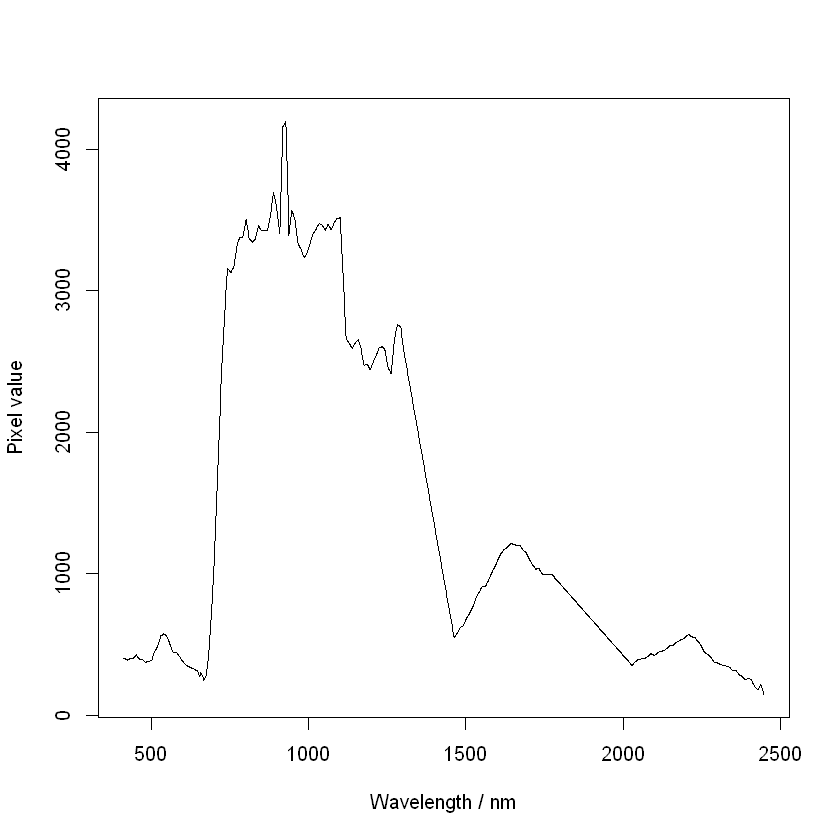

In [8]:
#| code-fold: true
#plot the data again
plot (wl1, dat1[1,], type="l", xlab="Wavelength / nm", ylab="Pixel value")

Narrow band vegetation indices

In [9]:
# ndre
dat2 <- t (apply (dat, 1, refine, wl=wl, wl.out=c (720, 790)))
NDRE <- (dat2[,2] - dat2[,1]) / (dat2[,2] + dat2[,1])

#reip
dat3 <- t (apply (dat, 1, refine, wl=wl, wl.out=c (670, 700, 740, 780)))
REIP <- 700 + 40 * ((((dat3[,1] + dat3[,4]) / 2) - dat3[,2]) / (dat3[,3] - dat3[,2]))

<div class="box">
## Q2.3 (1 pt) What are the ranges of the returned index values? Which (statistical) distribution do they have?
</div>

stat.desc(NDRE)
nbr.val      304.0000       
nbr.null       0.0000       
nbr.na         0.0000       
min            0.1418       
max            0.3318       
range          0.1900       
sum           74.6666       
median         0.2516       
mean           0.2456       
SE.mean        0.0020       
CI.mean.0.95   0.0040       
var            0.0013       
std.dev        0.0357       
coef.var       0.1454

stat.desc(REIP)
nbr.val         304.0000    
nbr.null          0.0000    
nbr.na            0.0000    
min             710.1558    
max             719.7072    
range             9.5514    
sum          217795.1779    
median          716.7946    
mean            716.4315    
SE.mean           0.1022    
CI.mean.0.95      0.2011    
var               3.1738    
std.dev           1.7815    
coef.var          0.0025

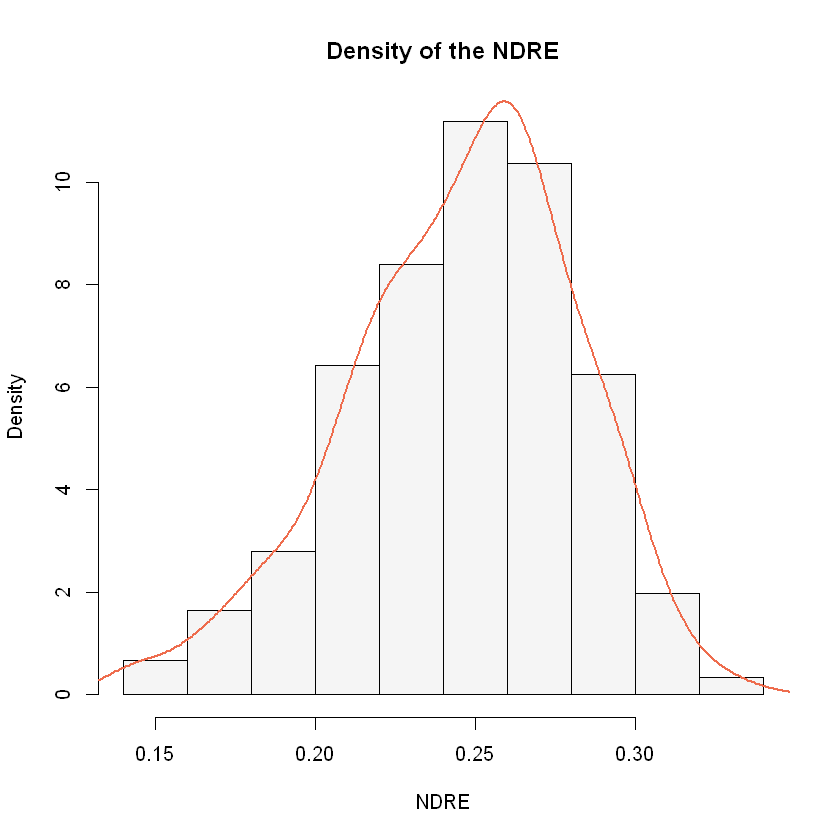

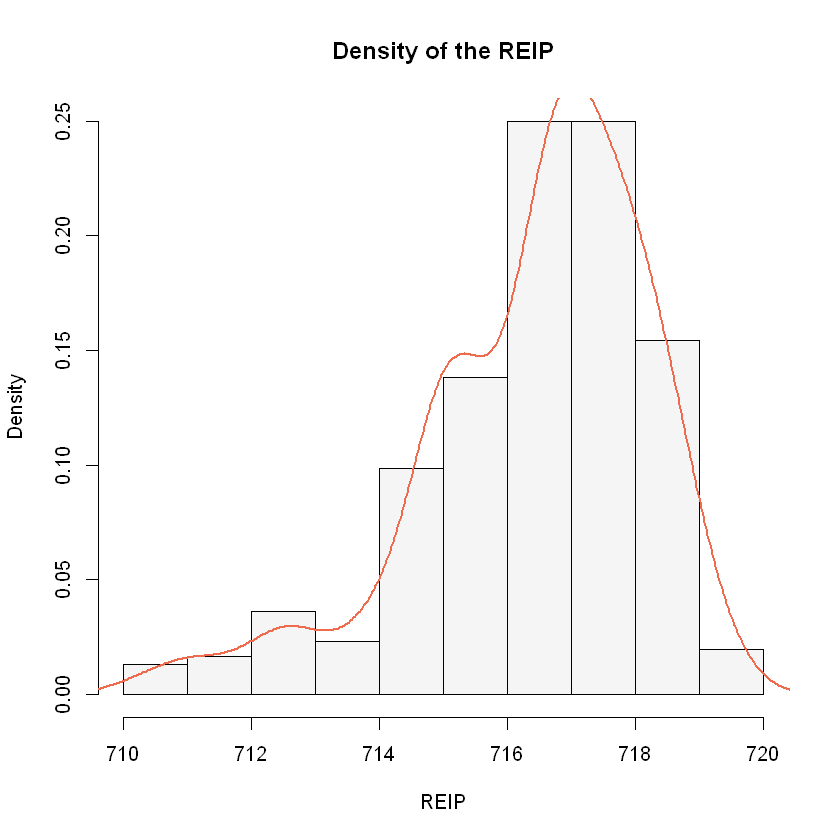

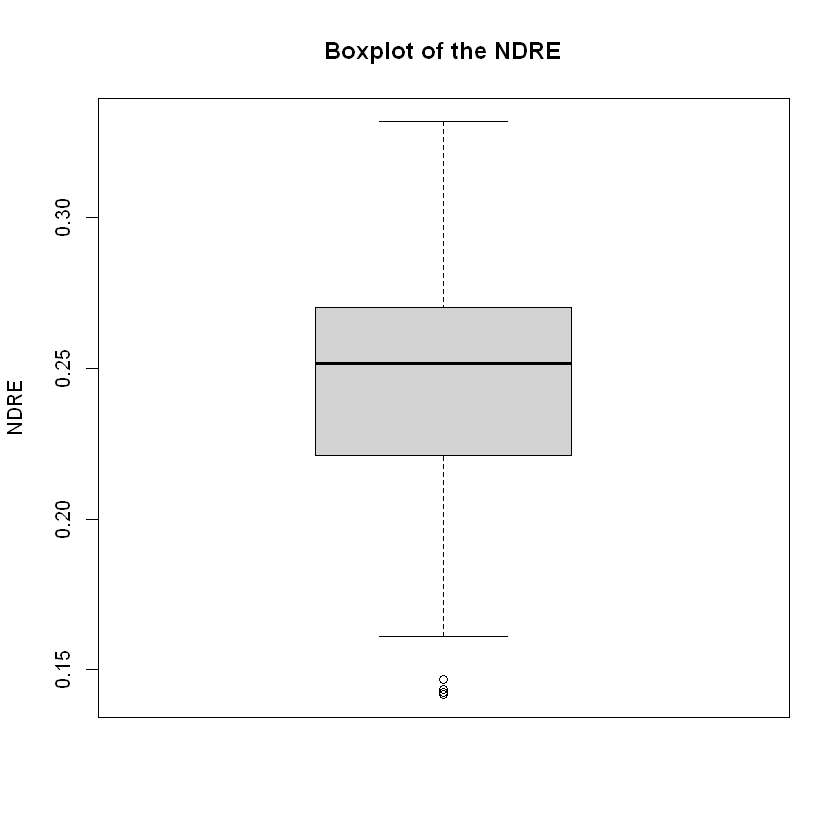

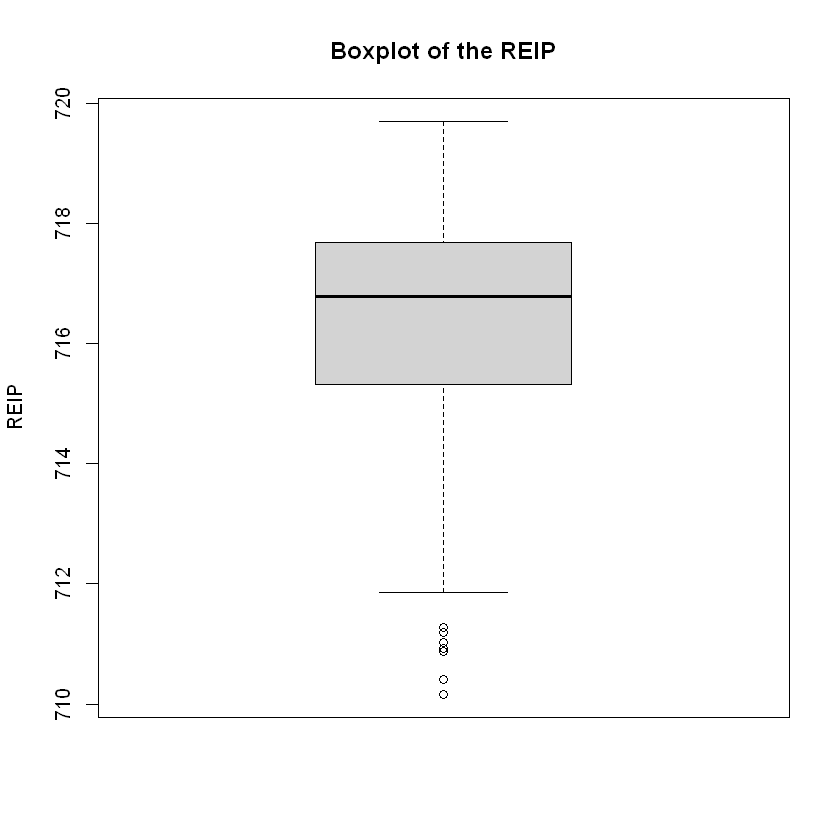

In [10]:
#install.packages("summarytools")
#library(summarytools)
#library(psych)
#print(describeBy(NDRE)["skew"])
#summary(NDRE)
#summary(REIP)
#install.packages("pastecs")
library(pastecs)
display(round(as.data.frame(stat.desc(NDRE)),4))
display(round(as.data.frame(stat.desc(REIP)),4))

#combine density and hist
hist(NDRE, col="#f5f5f5", border="#000000", main="Density of the NDRE", xlab="NDRE", freq=FALSE)
lines(density(NDRE), col = "#ee6c4d", lwd = 2)

hist (REIP, col="#f5f5f5", border="#000000", main="Density of the REIP", xlab="REIP", freq=FALSE)
lines(density(REIP), col = "#ee6c4d", lwd = 2)

boxplot(NDRE, main="Boxplot of the NDRE", ylab="NDRE")
boxplot(REIP, main="Boxplot of the REIP", ylab="REIP")

<span style="color:#fc8acc">
**Answer:**
</span>

The NDRE ranges from 0.1418 to 0.3318 with a range of 0.1900 in total. The REIP ranges from 710.1558 to 719.7072 with a range of 9.5514 in total.
	
The NDRE has a mean of 0.2456 and a standard deviation of 0.0357. The REIP has a mean of 716.4315 and a standard deviation of 1.7815. Both seem relatively normally distributed and left skewed. The REIP has a stronger left skew than the NDRE and shows a wider range of outliers.

---

<br>
<br>

<div class="box">
## Q2.4  (1  pt)  Describe  the  performance  of  the  two  indices  as  indicators  of  leaf  nitrogen.  Which  one  is  apparently more suitable? How do you judge their overall performance?
</div>


[1] "Correlation of NDRE against mean leaf nitrogen: 0.463641384661882"


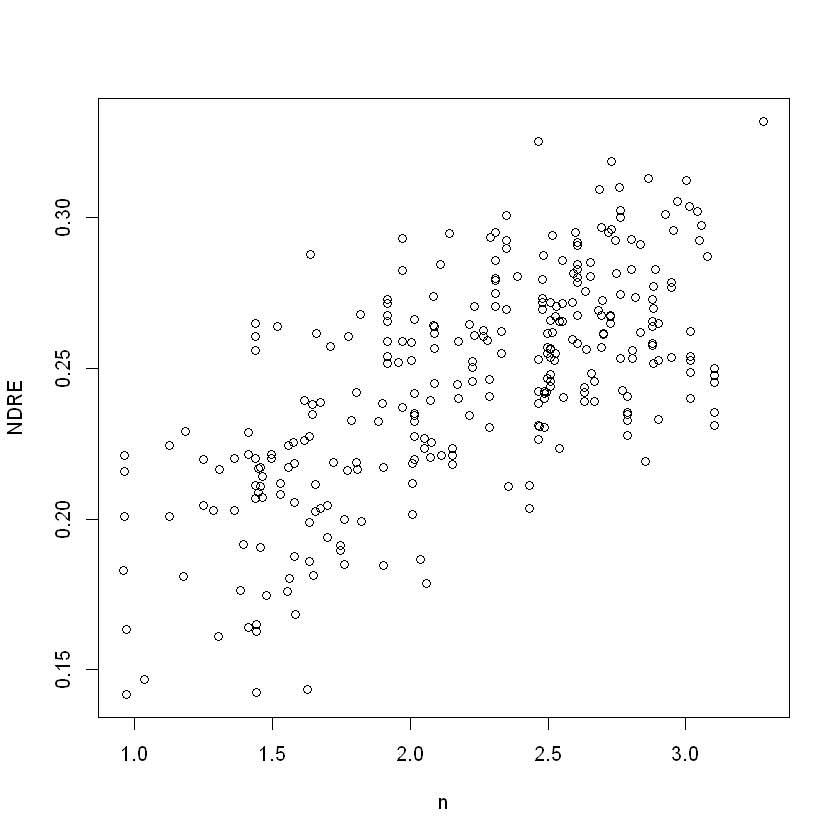

[1] "Correlation of REIP against mean leaf nitrogen: 0.46343403562784"


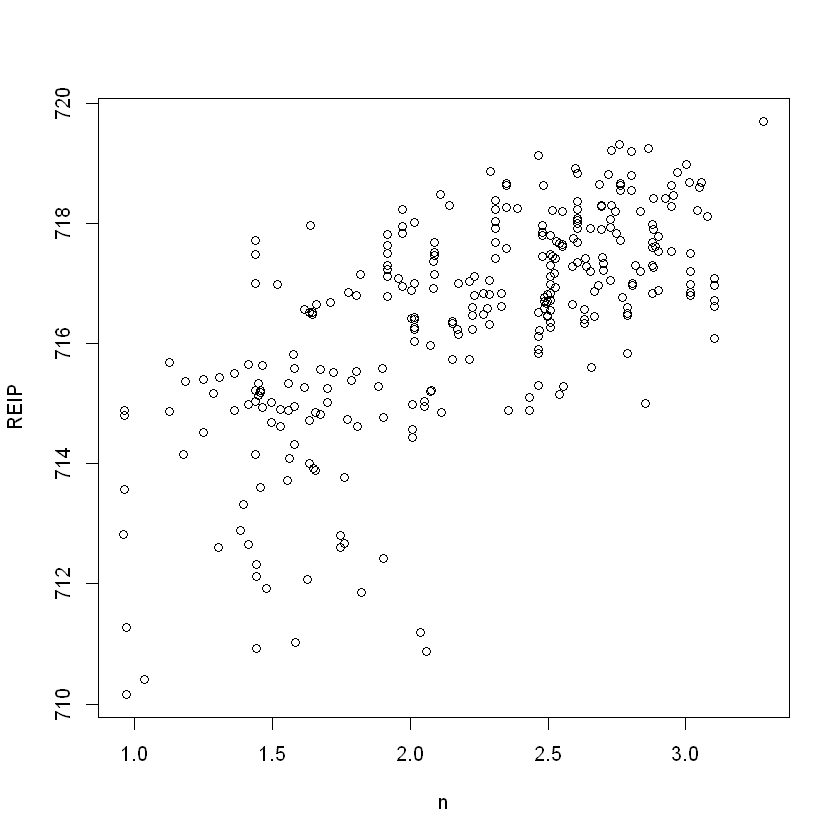

In [11]:
#| code-fold: true
# plot the indices against the mean N content
plot (n, NDRE)
print(paste("Correlation of NDRE against mean leaf nitrogen:", cor (n, NDRE)^2))
plot (n, REIP)
print(paste("Correlation of REIP against mean leaf nitrogen:", cor (n, REIP)^2))

<span style="color:#fc8acc">
**Answer:**
</span>

With regard to the correlation with the leaf nitrogen content, the NDRE with a correlation coefficient of 0.4636 performs slightly better than the REIP with a correlation coefficient of 0.4634. This difference is too small to identify the NDRE as better. Nevertheless, the NDRE seems to scatter somewhat more widely but to follow a clear linear correlation, while the REIP shows a very high scatter in the range up to 2 % leaf nitrogen content and a clear linear correlation can only be recognized above 2 % leaf nitrogen content. All in all, both seem to be able to describe the leaf nitrogen content, albeit not accurately. However, the NDRE seems to be somewhat more suitable for the reasons mentioned.

---

<br>
<br>

<div class="box">
##  Q2.5 (3 pts) Leaf nitrogen was measured as percentage of the leaf dry weight. Is this a suitable metric for spectral analyses? Suggest some improvements for future data acquisitions and analyses.
</div>

<span style="color:#fc8acc">
**Answer:**
</span>

I guess the suitability of measuring leaf nitrogen as a percentage of leaf dry weight for spectral analyses depends a little on the specific research question and the exactness required.
While the metric provides a direct measure of the amount of nitrogen in the leaf, spectral analyses can be sensitive to the absolute amount of nitrogen in the leaf. For example, if the leaf is very thin, the absolute amount of nitrogen in the leaf might be low, even if the percentage of nitrogen in the leaf is high. This could lead to a misinterpretation of the spectral analysis. In addition, the percentage of nitrogen in the leaf might be affected by other factors, like chlorophyll content, leaf water content or leaf surface properties. This could also lead to a misinterpretation of the spectral analysis.

Improvements for future data acquisitions and analyses could include measuring other variables that could affect the spectral analysis, like leaf water content, leaf thickness, or leaf surface properties.


---

<br>
<br>

Spectral smoothing...


Attache Paket: 'signal'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, poly




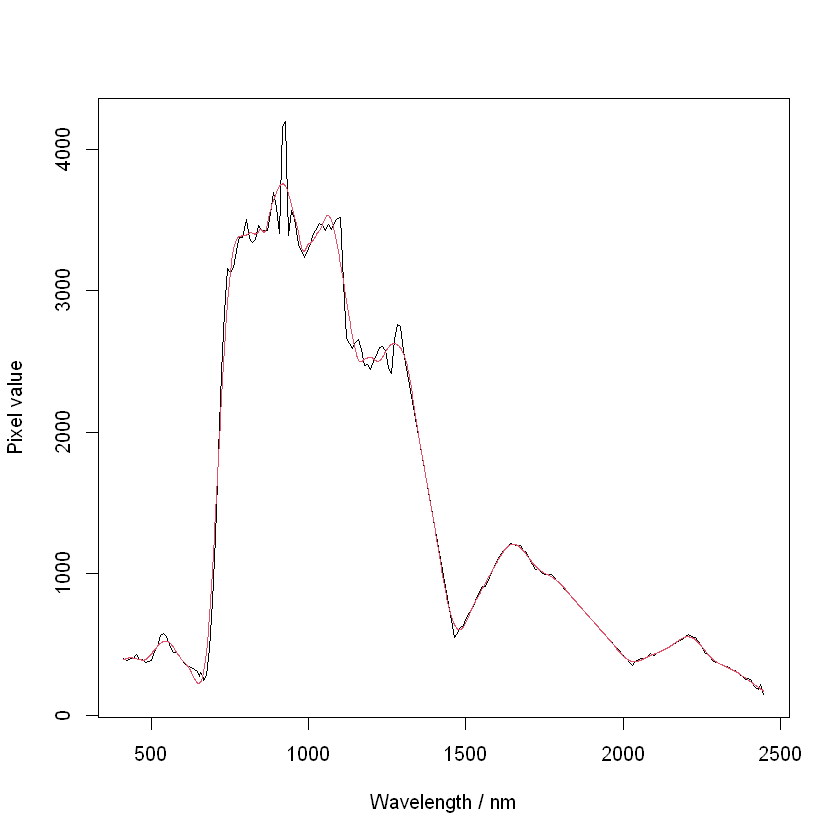

In [12]:
library(signal)

dat4 <- t (apply (dat1, 1, sgolayfilt, p=3, n=131))
plot (wl, dat[1,], type="l", xlab="Wavelength / nm", ylab="Pixel value")
lines (wl1, dat4[1,], col=2)

<div class="box">
## Q2.6 (2 pts) How do the degree of the polynom and the window size affect the outcome? Vary the polynom (e.g. 2nd degree, 4th degree, etc.) and the window size and compare the results. Which differences become apparent?
</div>

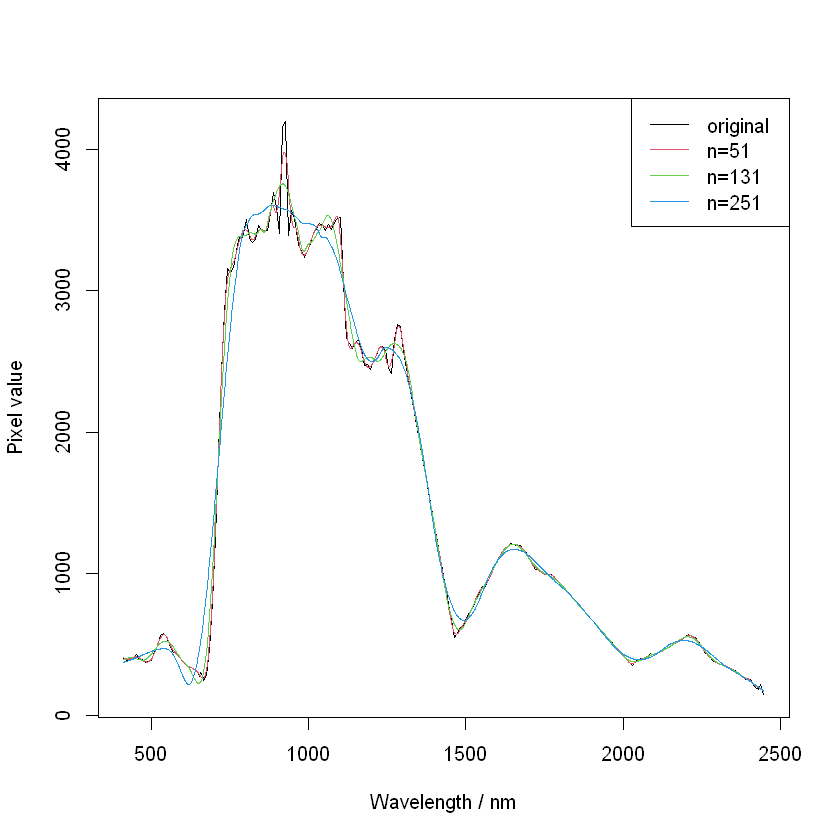

In [13]:
# changing the window size
dat41 <- t (apply (dat1, 1, sgolayfilt, p=3, n=51))
dat42 <- t (apply (dat1, 1, sgolayfilt, p=3, n=251))

#plot
plot (wl, dat[1,], type="l", xlab="Wavelength / nm", ylab="Pixel value")
lines (wl1, dat41[1,], col=2)
lines(wl1, dat4[1,], col=3)
lines (wl1, dat42[1,], col=4)
legend ("topright", legend=c ("original", "n=51", "n=131", "n=251"), col=c (1,2,3,4), lty=1)

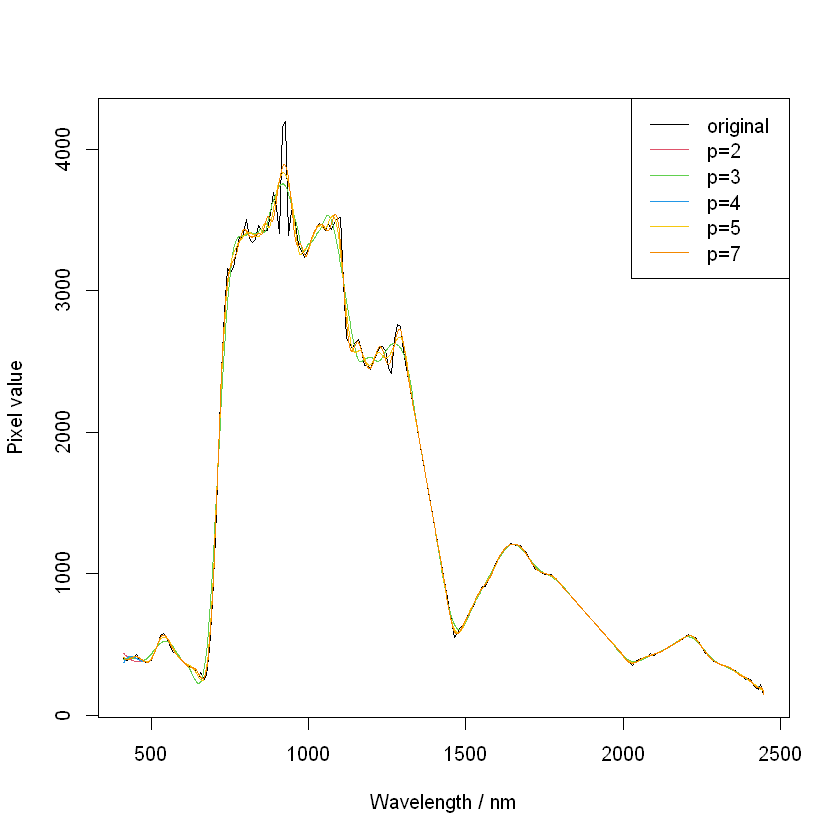

In [14]:
#changing the polynomial degree
dat43 <- t (apply (dat1, 1, sgolayfilt, p=2, n=131))
dat44 <- t (apply (dat1, 1, sgolayfilt, p=3, n=131))
dat45 <- t (apply (dat1, 1, sgolayfilt, p=4, n=131))
dat46 <- t (apply (dat1, 1, sgolayfilt, p=5, n=131))
dat47 <- t (apply (dat1, 1, sgolayfilt, p=7, n=131))

#plot
plot (wl, dat[1,], type="l", xlab="Wavelength / nm", ylab="Pixel value")
lines (wl1, dat43[1,], col=2)
lines (wl1, dat44[1,], col=3)
lines (wl1, dat45[1,], col=4)
lines (wl1, dat46[1,], col=7)
lines (wl1, dat47[1,], col="#f38800")
legend ("topright", legend=c ("original", "p=2", "p=3", "p=4", "p=5", "p=7"), col=c (1,2,3,4,7,"#f38800"), lty=1)


<span style="color:#fc8acc">
**Answer:**
</span>

The window size and the polynomial degree affect the fitting of the underlying original data curve. The smaller the window size, the more the original data curve is followed. The larger the window size, the more the original data curve is smoothed. Equally, a more complex function with higher polynomial degrees seems to stronger follow the peaks and valleys of the original data curve. A less complex function with lower polynomial degrees seems to smooth the original data curve more. The even and odd polynomial "pairs" (e.g. 2d and 3rd) hardly differ in their behavior and each follow a similar curve

---

<br>
<br>

<div class="box">
## Q2.7  (1  pt)  Repeat  the  comparison  of  the  index  values  to  the  leaf  nitrogen  values.  Does  the  smoothing change the result? Did the performance of the two indicators improve?
</div>

In [15]:
#Recalculate the NDRE and the REIP for the smoothed data (using the filter parameters  p=3, n=131).
REIP2 <- 700 + 40 * ((((dat4[,257] + dat4[,367]) / 2)- dat4[,287]) /
        (dat4[,327] - dat4[,287]))
NDRE2 <- (dat4[,377] - dat4[,307]) / (dat4[,377] + dat4[,307])

[1] "Correlation of NDRE against mean leaf nitrogen: 0.480162408852308"


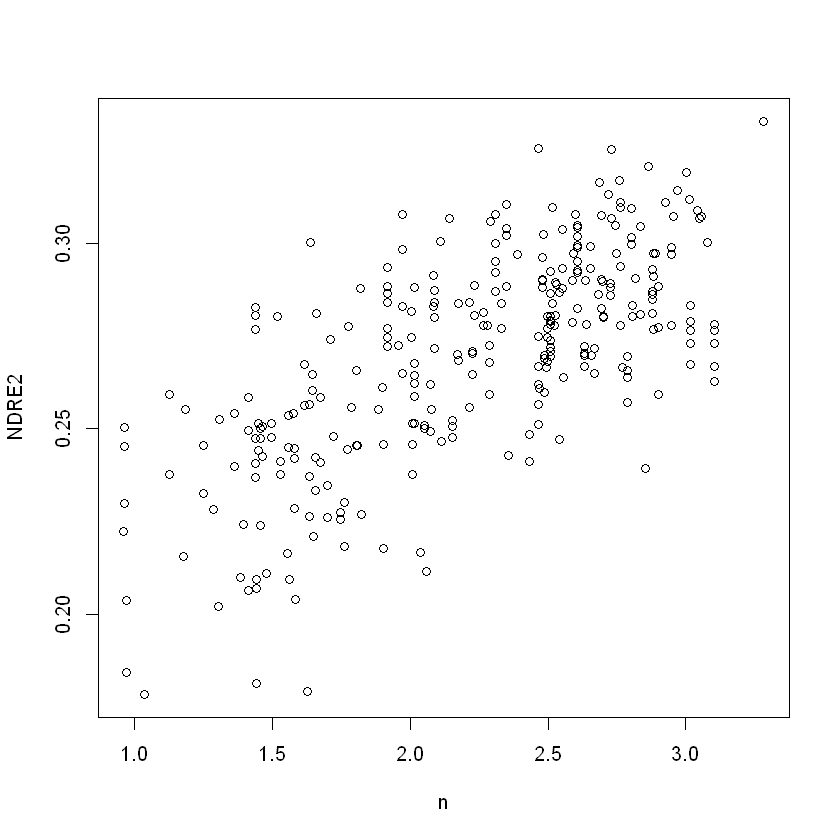

[1] "Correlation of REIP against mean leaf nitrogen: 0.432105688761979"


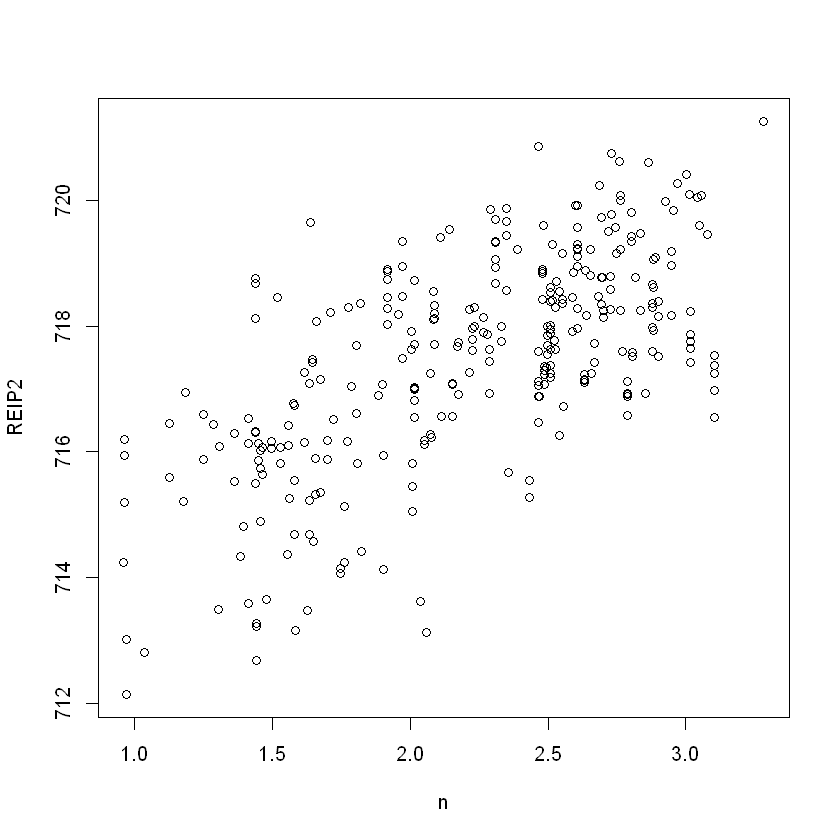

In [16]:
#| code-fold: true
# plot the indices against the mean N content
plot (n, NDRE2)
print(paste("Correlation of NDRE against mean leaf nitrogen:", cor (n, NDRE2)^2))
plot (n, REIP2)
print(paste("Correlation of REIP against mean leaf nitrogen:", cor (n, REIP2)^2))

<span style="color:#fc8acc">
**Answer:**
</span>

Looking at the scatter plot the performance of the REIP seems to have improved with less scatter in the range up to 2 % leaf nitrogen content. The NDRE seems to have reduced the general scattering slightly but with no strong changes. 
In contrast to this observation the differences in the correlation coeffient increased. The correlation coefficient of the REIP decreased to 0.4321 while for the NDRE it increased to 0.4802.
The NDRE still seems to perform better than the REIP.

---

<br>
<br>

Spectral derivatives...

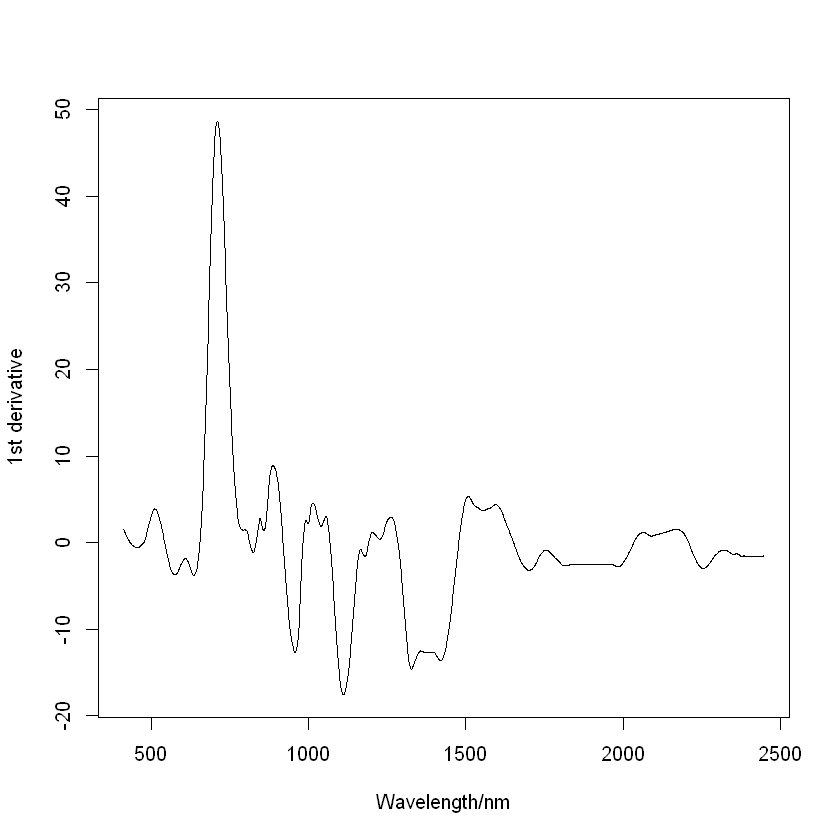

In [17]:
dat5 <- t (apply (dat1, 1, sgolayfilt, p=3, n=131, m=1)) ## for the 1st order derivatives
mxd1 <- wl1[apply (dat5, 1, which.max)]
plot (wl1, dat5[1,], type="l", xlab="Wavelength/nm", ylab="1st derivative")

<div class="box">
## Q2.8 (2 pts) What is the range of the wavelength position of the 1st order derivative? Compare it to the REIP. Is this position of the 1st derivative maximum in line with the red edge infection point? If not, how do they differ in their assessments?
</div>

stat.desc(mxd1)
nbr.val         304.0000    
nbr.null          0.0000    
nbr.na            0.0000    
min             706.0000    
max             719.0000    
range            13.0000    
sum          216913.0000    
median          714.0000    
mean            713.5296    
SE.mean           0.1483    
CI.mean.0.95      0.2918    
var               6.6856    
std.dev           2.5857    
coef.var          0.0036

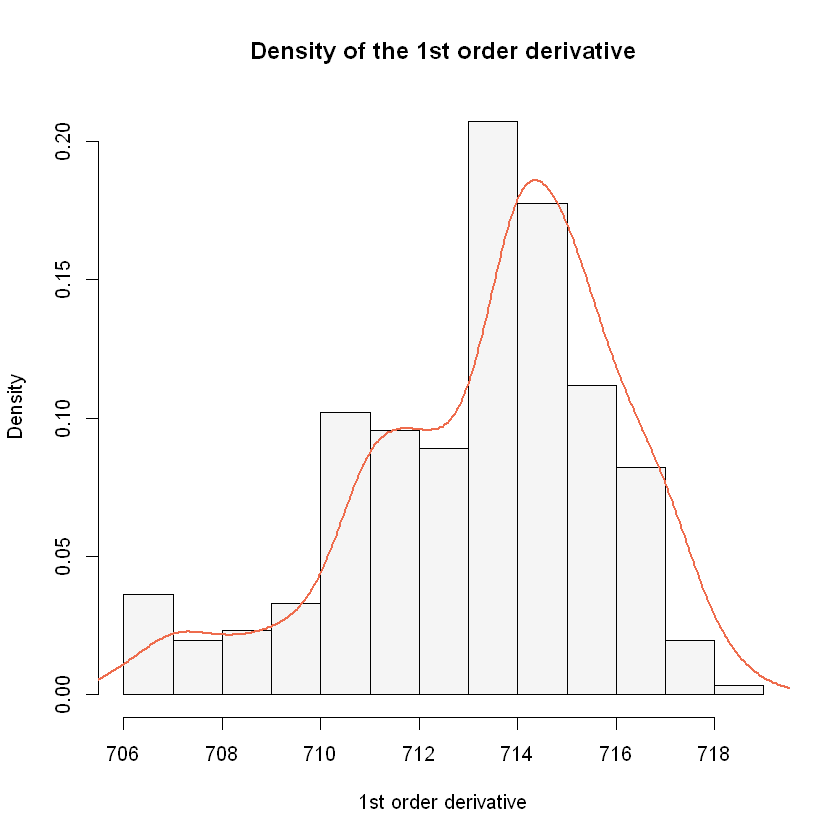

stat.desc(REIP)
nbr.val         304.0000    
nbr.null          0.0000    
nbr.na            0.0000    
min             710.1558    
max             719.7072    
range             9.5514    
sum          217795.1779    
median          716.7946    
mean            716.4315    
SE.mean           0.1022    
CI.mean.0.95      0.2011    
var               3.1738    
std.dev           1.7815    
coef.var          0.0025

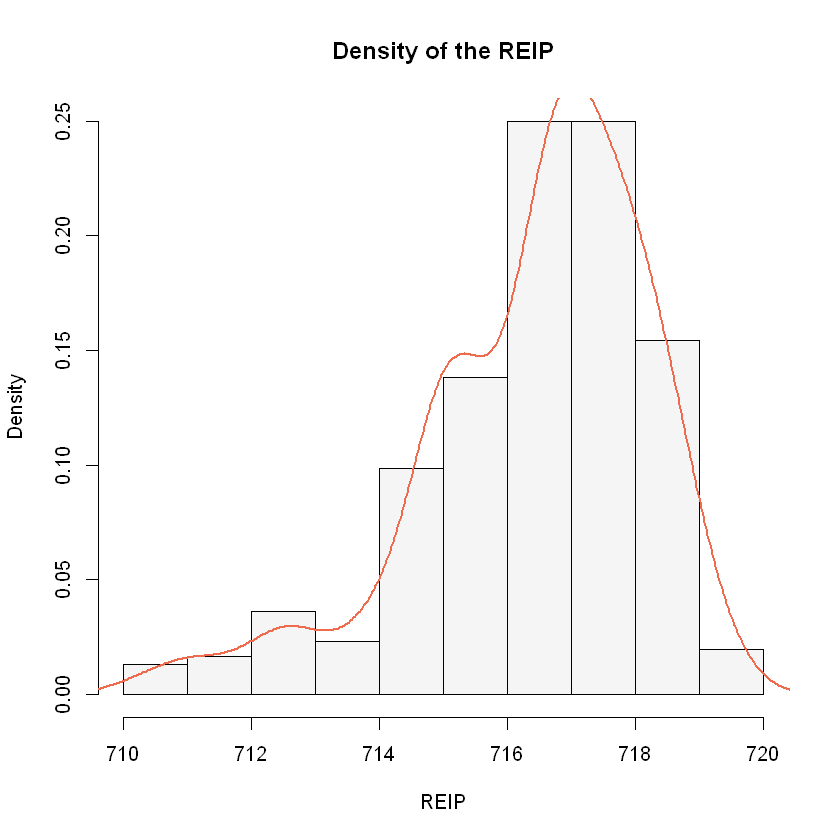

In [18]:
# 1st order derivative
hist (mxd1, col="#f5f5f5", border="#000000", main="Density of the 1st order derivative", xlab="1st order derivative", freq=FALSE)
lines(density(mxd1), col = "#ee6c4d", lwd = 2)

display(round(as.data.frame(stat.desc(mxd1)),4))

#reip
hist (REIP, col="#f5f5f5", border="#000000", main="Density of the REIP", xlab="REIP", freq=FALSE)
lines(density(REIP), col = "#ee6c4d", lwd = 2)

display(round(as.data.frame(stat.desc(REIP)),4))


<span style="color:#fc8acc">
**Answer:**
</span>

What is the range of the wavelength position of the 1st order derivative? Compare it to the REIP. Is this position of the 1st derivative maximum in line with the red edge infection point? If not, how do they differ in their assessments?

The first order derviative ranges from exactly 706 to 719 with a total range of 13. The maximum of 719 is therefore in line with the maximum of the REIP so the red edege infection point at 719.7072. However, the 1st order derivative is more widely scattered while the peak of the REIP is steeper. 

---

<br>
<br>

<div class="box">
## Q2.9 (6 pts) Implement this work flow in your environment. How do you do it? Which polynom and window size did you choose and how did you come to this parameterization? Provide a plot of a smoothed and 
original pixel spectrum to visualize your results.
</div>


1. extract the pixel spectra into a pixel x band table (pixels in rows, bands in columns)
2. if the bands have an irregular wavelength spacing, interpolate to regular intervals
3. identify a suitable polygon and window size for the Savitzky­Golay filter that results in the desired level of
   smoothing
4. smooth the spectra in the (interpolated) pixel x band table
5. If in step 2 an interpolation was performed, interpolate the smoothed spectra back to the original bands.
6. write the smoothed spectra back to the image matrix

Finally, we test the smoothing operation on image data sets. For this purpose, we go back to the image data sets 
from session 1. Load the image that you used last time in your work space. Use a spatial subset of 100 pixels x 100 
pixels to make the operation run faster (in R and using the terra package first define a smaller extent of 100 px x 100 px with ext() and then use this extent to clip the image with the crop() function). The typical work flow for smoothing image pixels is

1. extract the pixel spectra into a pixel x band table (pixels in rows, bands in columns)
2. if the bands have an irregular wavelength spacing, interpolate to regular intervals
3. identify a suitable polygon and window size for the Savitzky­Golay filter that results in the desired level of
   smoothing
4. smooth the spectra in the (interpolated) pixel x band table
5. If in step 2 an interpolation was performed, interpolate the smoothed spectra back to the original bands.
6. write the smoothed spectra back to the image matrix

terra 1.5.21


Attache Paket: 'terra'


Das folgende Objekt ist maskiert 'package:signal':

    resample


Das folgende Objekt ist maskiert 'package:pastecs':

    extract


Warning message:
"[rast] unknown extent
"


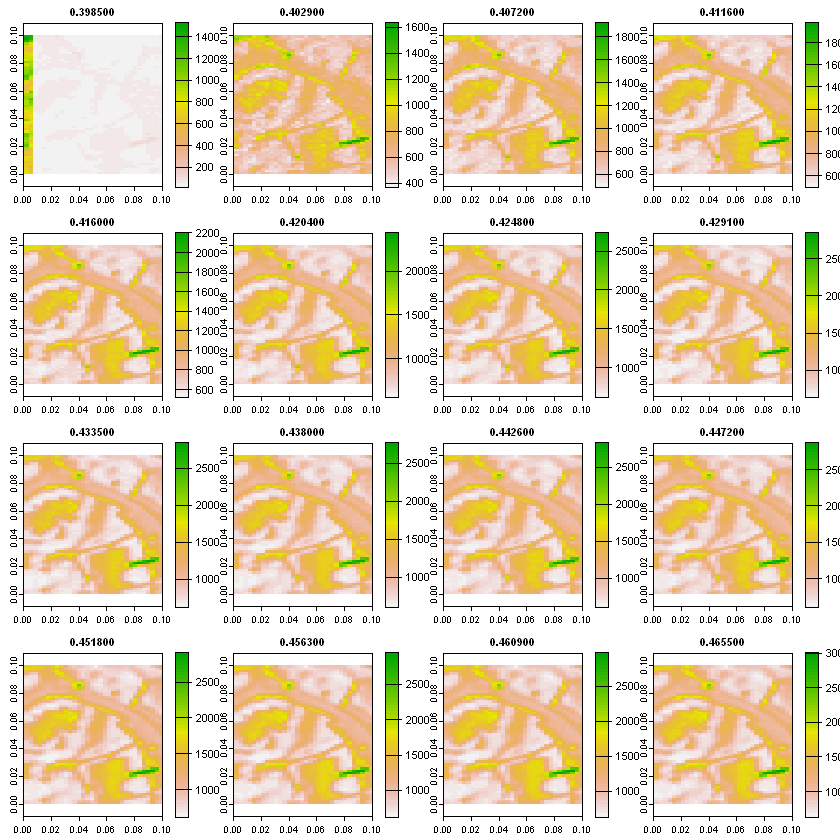

In [19]:
library(terra)
# load the image
setwd(paste(repo_dir, "/01_intro", sep=""))
urb.im <- rast ("0913-1248_ref.dat")
# use a spatial subset
urb.im <- crop (urb.im, ext (0, 0.1,0, 0.1))
plot(urb.im)

In [28]:
#1. extract the pixel spectra into a pixel x bands table
spectra<-as.data.frame(urb.im, row.names=NULL, optional=FALSE, xy=FALSE, cells=FALSE, na.rm=FALSE)

#2. interpolate to regular intervals
spectra

0.398500 0.402900 0.407200 0.411600 0.416000 0.420400 0.424800 0.429100
1    1438     1178     1166     1236     1323     1433     1563     1593    
2    1403     1153     1172     1238     1313     1449     1578     1614    
3      73     1108     1269     1269     1352     1456     1590     1638    
4      76     1141     1274     1234     1325     1455     1591     1623    
5      66     1006     1199     1210     1275     1384     1529     1577    
6      70     1055     1172     1128     1186     1284     1430     1476    
7      70     1058     1228     1242     1313     1420     1569     1621    
8      81     1197     1298     1279     1410     1563     1716     1749    
9      56      867     1040     1125     1282     1403     1557     1600    
10     43      689      811      857      953     1065     1170     1206    
11     37      603      700      693      731      783      872      905    
12     32      536      629      638      692      749      822      838    
13     36      593      687      680      704      750      841      897    
14     30      511      626      631      661      726      794      817    
15     35      562      622      585      608      666      752      776    
16     34      547      632      591      606      650      711      717    
17     30      491      563      540      551      597      660      680    
18     38      594      640      611      643      688      736      762    
19     40      608      691      651      668      722      837      873    
20     35      550      667      656      673      747      854      907    
21     31      496      618      649      703      775      873      903    
22     34      527      648      674      718      764      839      872    
23     38      570      646      651      700      765      853      881    
24     32      490      613      653      705      773      851      870    
25     37      550      646      657      698      771      853      888    
26     40      589      676      667      708      761      825      850    
27     38      554      636      632      653      706      753      769    
28     34      501      619      619      627      660      710      728    
29     36      528      611      588      624      678      733      732    
30     40      572      682      673      704      753      819      839    
...  ...      ...      ...      ...      ...      ...      ...      ...     
1891 30       553      616       599      636      699      761      769    
1892 34       600      642       591      630      689      761      767    
1893 38       652      733       746      831      902      981      995    
1894 27       513      650       671      707      774      862      914    
1895 34       586      627       593      645      709      765      791    
1896 35       588      624       586      621      682      742      750    
1897 29       521      552       543      600      651      695      719    
1898 27       490      601       591      579      618      681      709    
1899 30       523      573       564      610      660      709      721    
1900 34       566      626       610      667      725      803      816    
1901 46       728      812       812      881      944     1021     1052    
1902 46       712      798       829      936     1034     1128     1153    
1903 46       714      826       842      925      997     1094     1114    
1904 43       670      763       752      797      843      903      920    
1905 41       647      727       720      753      811      882      914    
1906 54       819      982       994     1061     1144     1250     1261    
1907 57       840      962       938     1003     1083     1213     1238    
1908 52       779      977      1008     1066     1150     1278     1310    
1909 54       789      886       894      980     1078     1186     1237    
1910 54       797      945       968     1035     1133     1246     1298    
1

In [ ]:
#2. if the bands have an irregular wavelength spacing, interpolate to regular intervals
#3. identify a suitable polygon and window size for the Savitzky­Golay filter that results in the desired level of
   #smoothing
#4. smooth the spectra in the (interpolated) pixel x band table
#5. If in step 2 an interpolation was performed, interpolate the smoothed spectra back to the original bands.
#6. write the smoothed spectra back to the image matrix


<span style="color:#fc8acc">
**Answer:**
</span>

---

<br>
<br>